## УДК 553.3/.4.04:528.8(571.63)

# Распаковка и предварительная обработка дистанционной основы формата HDF в Python (на примере данных TERRA ASTER)

*С.Л. Шевырёв, Н.Г.Борискина, М.Ж.Шевырева,Горобейко Е.В.*

Дальневосточный геологический институт ДВО РАН, Владивосток; e-mail: shevirev@mail.ru

### Статья опубликована в "Успехи современного естествознания", №10, 2022
### https://s.natural-sciences.ru/pdf/2022/10/37914.pdf 

Изображения Земли из космоса часто используются в науках о Земле как источник информации о ландшафтах,горных породах, а также состоянии атмо-, гидро- и биосферы. Организация дорогостоящих полевых работ для целей геологической съемки, картирования, а также проноза и поисков месторождений полезных ископаемых требуют проведения предварительной оценки (рекогносцировки) территории, при этом эффективность проводимых работ напрямую связана с качеством и актуальностью дистанционных материалов. Пользовательская подготовка космических данных нулевого и первого уровней обработки зачастую является задачей, затратной по времени и объему потребляемых вычислительных ресурсов, кроме того, пользовательские географические информационные системы (ГИС) могут не обладать достаточными возможностями для ее решения. Как правило, предоставляемые данные нулевого и первого уровней обработки представляют собой показатели излучения на сенсоре спректрорадиометра, испытавшего атмосферное рассеяние, значение которого отличается по отдельным каналам изображения. это значит, что получение значений отражательной способности поверхности и вычисление значений ее температуры требует выполнения поканальной коррекции. Сайты организаций, предоставляющих доступ к спутниковым данным, а также спецификации этих данных, содержат информацию об алгоритмах атмосферной коррекций изображения. Кроме этого необходимо отметить, что многозональные данные могут предоставляться в специализированных форматах, не поддерживаемых пользовательскими ГИС. В настоящей статье рассматривается алгоритм извлечения (распаковки) каналов ASTER из файлов иерархического формата данных (HDF), их подготовка, включающая атмосферную коррекцию, вычисление значений температуры поверхности для температурных каналов ночной съемки и сохранение их в популярном формате GeoTiff с использованием пользовательского скрипта Python, в основе которого лежит библиотека GDAL. Скрипт можно адаптировать для применения к другим космическим данным, кроме того, от может использоваться для обучения студентов, обучающихся по направлений "Науки о Земле" программированию на Python, работе с GDAL и основам геоинформатики. 

Ключевые слова: gdal, дистанционное зондирование Земли, python, геологическое картирование, иерархический формат данных, коррекция дистанционного изображения





### Введение 

Наращивание объемов запасов и значений подсчитанных прогнозных ресурсов рудных и нерудных полезных ископаемых, требует усиления роли технологий дистанционного зондирования Земли и, соответственно, привлечения новых источников свободно распространяемых космических данных, а также и усиления эффективности применения существующих. Качество применяемых материалов космических съемок определяется степенью их предварительной подготовки. Данные продвинутого космического радиометра температурного излучения (ASTER) первого уровня обработки распространяются исочником в виде архивов в формате HDF (иерархический формат данных). Использование первого уровня обработки (L1) в оригинальных  исследованиях позволяет вполне реализовать потенциал этого источника данных, а также получать спутниковые продукты максимального качества.
Целью настоящей работы является рассмотрения решения задачи распаковки изображений Terra ASTER из формата HDF, преобразования цифровых значений спектральной яркости в показатели отражательной способности, регистрируемой в верхней части атмосферы, приближенное вычисление значений температуры земной поверхности для ночных изображений, а также сохранение изображений в формате с географической привязкой (GeoTiff). В качестве средств для выполнения вычислений используется библиотека GDAL и язык программирования Python, методической основой служат официальные материалы от издателей изображений [Working with ASTER...,2022]. 

### Материалы и методы исследования

Перенос региональных работ на территории с сложными рельефом и геологическим строением усиливает роль дистанционных исследований, включающих геофизические методы, а также анализ и интерпретацию космических изображений Земли. Последнее требует проведения не только исследования данных и получения информации, непосредственно связанной с содержанием изображения, но и его подготовкой, связанной с выводом из форматов распространения и хранения. 

Состав поверхностных комплексов и глубинное строение земной коры может быть изучено посредством анализа изображений продвинутого космического радиометра тепловой эмиссии и отражения (Advanced Spaceborne Thermal Emission and Reflection Radiometer, ASTER), установленного на космический аппарат Terra, запущенный NASA 18 декабря 1999 года [Изображения Terra…, 2022]. Изображения предоставляются в нескольких уровнях обработки, разрешения каналов различаются от 15 м для видимого и ближнего инфракрасного диапазонов (VNIR), 30 м для коротковолнового инфракрасного (SWIR) и 90 м для теплового инфракрасного (TIR) диапазонов, наборы данных включают материалы дневной и ночной съёмок. Архив космических изображений Геологической службы содержит данные, полученных за почти 23 года работы этого космического аппарата, доступ к которым  предоставляется без ограничений [EarthExplorer…, 2020]. Данные первого уровня обработки представляют собой исходные материалы, дающие исследователю наибольший простор действий в дальнейших преобразованиях изображения и получении спутниковых продуктов и представляют собой данные показателей излучения на сенсоре,  корректированные относительно модели местности в виде 14 спектральных каналов, упакованных в иерархическом формате данных (Hierarchical Data Format, HDF) [Изображения Terra…, 2022].

Формат HDF был разработан Национальным центром суперкомпьютерных вычислений  (NCSA) для предоставления пользователям возможности хранить, передавать и обрабатывать научные данные в различных операционных системах [HDF…, 2022]. В соответствии с информацией разработчиков, основные его особенности включают: стандартизованность и платформенная независимость, может содержать научные данные и растровые изображения. Файл включает информацию о себе, является самоописательным, это значит, что каждому объекту, содержащемуся в файле, соответствует отдельный тег, а дополнительные модели данных могут быть добавлены как разработчиками так и пользователями формата [HDF…, 2022]. 

Открытие архивов HDF, извлечение данных съёмок в виде цифровых матриц, а также получение метаданных, содержащих сведения о параметрах и условиях съемки удобно производить в Python с помощью библиотеки абстракции географических данных (GDAL)[GDAL, 2022]. Эта библиотека, распространяемая на основе свободной лицензии, позволяет работать с растровыми и векторными форматами пространственных данных [GDAL License..., 2022]. Библиотека обладает API (Application Programming Interface) для работы с популярными языками программирования (C,C++,Python), позволяющая создавать на ее основе утилиты и геоинформационные системы [GDAL API..., 2022].

Материалы съемок ASTER поставляются в виде 14 спектральных каналов, в их числе полученные в видимом и ближнем инфракрасном (visible and near infrared, VNIR), коротковолновом инфракрасном (shortwave infrared, SWIR), и термальном инфракрасном (thermal infrared, TIR) диапазонах. Характеристики изображений спектральных каналов приведены в Таблице 1.

Таблица 1. Характеристики спектральных каналов ASTER [Working with ASTER L1T…, 2022].

<table>
   <tr>
   <td>Наименование</td><td>Описание</td><td>Разрешение</td><td>Размерность</td><td>Тип данных</td><td>Диапазон</td>    
   </tr>
   <tr>
   <td>VNIR_Band1</td>
   <td>Ближний канал видимого и инфракрасного излучения 1 (0,52 to 0,60 мкм)</td>
   <td>15 м</td>
   <td>Вт/м²/ср/мкм</td>
   <td>8-и разрядное целое без знака</td>
   <td>0 до 255</td>    
   </tr>
   <tr>
   <td>VNIR_Band2</td>
   <td>Ближний канал видимого и инфракрасного излучения 2 (0,63 to 0,69 мкм)</td>
   <td>15 м</td>
   <td>Вт/м²/ср/мкм</td>
   <td>8-и разрядное целое без знака</td>
   <td>0 до 255</td>    
   </tr>
   <tr>
   <td>VNIR_Band3N</td>
   <td>Ближний канал видимого и инфракрасного излучения 3N (0,78 to 0,86 мкм)</td>
   <td>15 м</td>
   <td>Вт/м²/ср/мкм</td>
   <td>8-и разрядное целое без знака</td>
   <td>0 до 255</td>    
   </tr>
   <tr>
   <td>SWIR_Band4</td>
   <td>Коротковолновой инфракрасный канал 4 (1,600 to 1,700 мкм)</td>
   <td>30 м</td>
   <td>Вт/м²/ср/мкм</td>
   <td>8-и разрядное целое без знака</td>
   <td>0 до 255</td>    
   </tr>
   <tr>
   <td>SWIR_Band5</td>
   <td>Коротковолновой инфракрасный канал 5 (2,145 to 2,185 мкм)</td>
   <td>30 м</td>
   <td>Вт/м²/ср/мкм</td>
   <td>8-и разрядное целое без знака</td>
   <td>0 до 255</td>    
   </tr>  
   <tr>
   <td>SWIR_Band6</td>
   <td>Коротковолновой инфракрасный канал 6 (2,185 to 2,225 мкм)</td>
   <td>30 м</td>
   <td>Вт/м²/ср/мкм</td>
   <td>8-и разрядное целое без знака</td>
   <td>0 до 255</td>    
   </tr>
   <tr>
   <td>SWIR_Band7</td>
   <td>Коротковолновой инфракрасный канал 7 (2,185 to 2,225 мкм)</td>
   <td>30 м</td>
   <td>Вт/м²/ср/мкм</td>
   <td>8-и разрядное целое без знака</td>
   <td>0 до 255</td>    
   </tr>
   <tr>
   <td>SWIR_Band8</td>
   <td>Коротковолновой инфракрасный канал 8 (2,295 to 2,365 мкм)</td>
   <td>30 м</td>
   <td>Вт/м²/ср/мкм</td>
   <td>8-и разрядное целое без знака</td>
   <td>0 до 255</td>    
   </tr>
   <tr>
   <td>SWIR_Band9</td>
   <td>Коротковолновой инфракрасный канал 9 (2,360 to 2,430 мкм)</td>
   <td>30 м</td>
   <td>Вт/м²/ср/мкм</td>
   <td>8-и разрядное целое без знака</td>
   <td>0 до 255</td>    
   </tr>
   <tr>
   <td>TIR_Band10</td>
   <td>Термальный инфракрасный канал 9 (8,125 to 8,475 мкм)</td>
   <td>90 м</td>
   <td>Вт/м²/ср/мкм</td>
   <td>16-и разрядное целое без знака</td>
   <td>0 до 65535</td>    
   </tr>
   <tr>
   <td>TIR_Band11</td>
   <td>Термальный инфракрасный канал 11 (8,475 to 8,825 мкм)</td>
   <td>90 м</td>
   <td>Вт/м²/ср/мкм</td>
   <td>16-и разрядное целое без знака</td>
   <td>0 до 65535</td>    
   </tr>
   <tr>
   <td>TIR_Band12</td>
   <td>Термальный инфракрасный канал 12 (8,925 to 9,275 мкм)</td>
   <td>90 м</td>
   <td>Вт/м²/ср/мкм</td>
   <td>16-и разрядное целое без знака</td>
   <td>0 до 65535</td>    
   </tr>
   <tr>
   <td>TIR_Band13</td>
   <td>Термальный инфракрасный канал 13 (10,250 to 10,950 мкм)</td>
   <td>90 м</td>
   <td>Вт/м²/ср/мкм</td>
   <td>16-и разрядное целое без знака</td>
   <td>0 до 65535</td>    
   </tr>
   <tr>
   <td>TIR_Band14</td>
   <td>Термальный инфракрасный канал 14 (10,950 to 11,650  мкм)</td>
   <td>90 м</td>
   <td>Вт/м²/ср/мкм</td>
   <td>16-и разрядное целое без знака</td>
   <td>0 до 65535</td>    
   </tr>  
</table>    

В соответствии с имеющимися рекомендациями, для синтеза спутниковых продуктов и изучения  ландшафтно-географических комплексов отражающей поверхности, показатели прошедшего атмосферу излучения на сенсоре радиометра, записанные в виде цифровых значений и хранящиеся в формате HDF, должны быть преобразованы в отражательную способность, регистрируемую в верхней части атмосферы (TOA Reflectance) [Working with ASTER L1T…, 2022].


Для распаковки и подготовки данных ASTER L1T был подготовлен скрипт Python [Shevyrev, 2022], алгоритм и этапы работы которого отражены на схеме (рис.1).

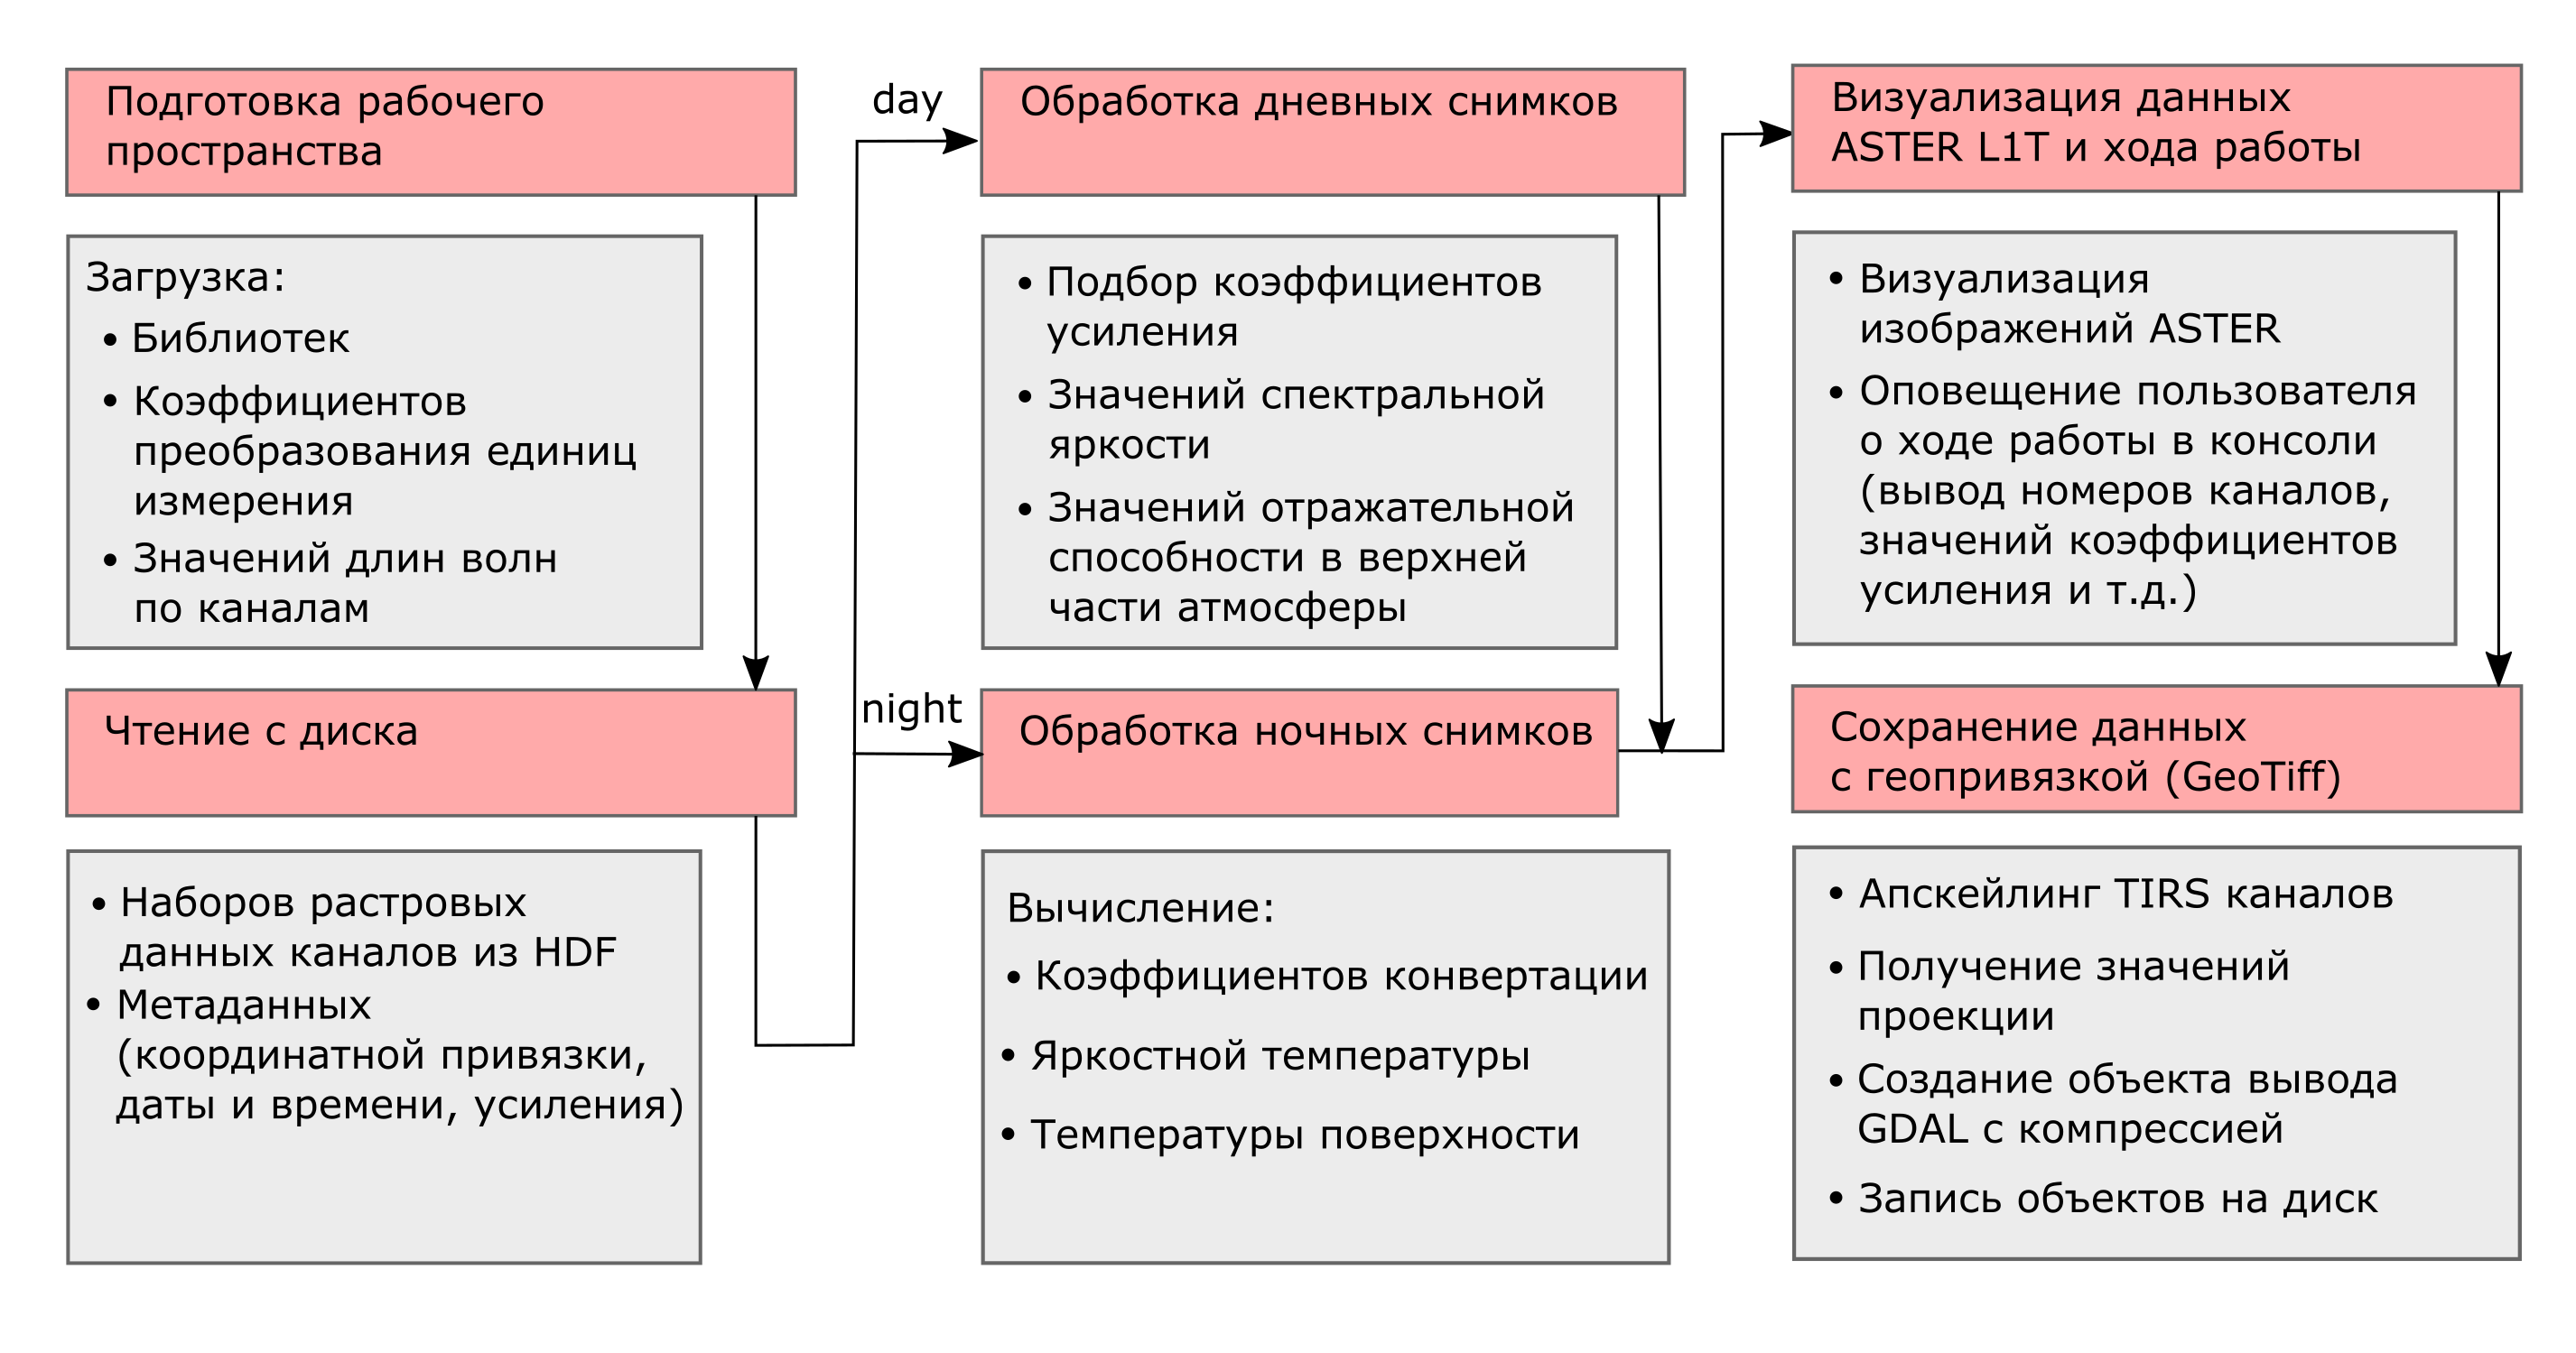

Рис. 1. Структура алгоритма распаковки, преобразования и сохранения данных ASTER L1T в виде изображений с геогрфической привязкой (GeoTiff).

Скрипт распаковки HDF файлов, представляющий собой программу с открытым исходным кодом на языке Python [Shevyrev, 2022], помимо ключевой для него библиотеки gdal, использует в работе библиотеки numpy (работа с матрицами и многомерными данными), pandas (открытие таблиц значений коэффициентов преобразования единиц и длин волн формата MS Excel), scikit-image для трансформации изображений, datetime  и time для работы с форматами даты и времени съемки, re для анализа строковых переменных и os для удобной работы с файлами на диске.
Скрипт не обладает визуальным интерфейсом, указание рабочего каталога, содержащего HDF файлы, осуществляется с помощью непосредственного редактирования файла программы с указанием значения переменной *foldname*. По умолчанию других действий от пользователя не требуется, программа самостоятельно определяет параметры расчета на основе имен файлов (которые необходимо оставить по умолчанию, переименование не допускается) и метаданных. Запуск скрипта рекомендуется производить с помощью научных сред разработки Spyder или Jupyter, основанных на интерактивной консоли IPython.   

Данные ASTER L1T хранятся в формате цифровых значений яркости изображений (digital numbers, DN). Для построения RGB изображений и спутниковых продуктов, необходимо получить значания отражательной способности в верхней части атмосферы (Top Of the Atmosphere reflectance, TOA). Для ее получения необходимо предварительно вычислить показатель излучения на сенсоре [Abrams и др., 1999]: 

$L_\gamma=(DN-1)\bullet ucc$ (1), 

где $L_\gamma$ — излучение в верхней части атмосферы, *DN* — значение яркости изображения, *ucc* — коэффициенты преобразования единиц [Abrams et al., 1999].    
Вычисление отражательной способности в верхней части атмосферы выполняется с помощью следующей формулы [Landsat 7 users..., 2022]: 

$\rho TO A_\gamma = \frac{\pi \bullet L\gamma \bullet d^2}{ESUN_\gamma \bullet cos(\theta_S)}$, (2) 

где  *d* — расстояние от Земли до Солнца, $ESUN_\gamma$ — среднее солнечное экзоатмосферное излучение, полученное по данным [Thome et al., 2001], $\theta_S$ — зенитный угол Солнца. 

Значения *ucc* для расчетов заимствуются из справочных таблиц [Abrams et al., 1999], угол  $\theta_S$ извлекается из метаданных HDF файла. Для получения значения *d* можно воспользоваться формулой(3):   
$d = (1 - 0,01672 \bullet cos(0,9856 * (doy - 4)))$, 

где *doy* — порядковый номер дня в году, в программе он находится за счет парсинга имен файлов HDF.

Вычисление отражательной способности в верхней части атмосферы производится для дневных изображений ("day", рис. 1). Ночные изображения ("night", рис. 1) получаются в термальном инфракрасном диапазоне (TIRS, каналы 10-14), их обработка позволяет найти приближенные значения температуры земной поверхности. Для этой цели используется методика расчета, описанная [Ghulam, 2009]. Для вычисленных значений излучения в верхней части атмосферы $L_y$ температура поверхности земли может быть найдена как (4): 

$T=\frac{K_2}{ln(\frac{K_1}{L_y}+1)}$ (4), 

где $K_1$ и $K_2$ это коэффициенты, предопределенные эффективной длиной волны на сенсоре спутника [Ghulam, 2009].

Так как каналы TIRS и SWIR обладают меньшим разрешением изображений (30 и 90 м соответственно), выполняется программное повышение разрешения до VNIR (15 м) для облегчения дальнейшего расчета пользователями спутниковых продуктов. Перед запуском программы необходимо указать расположение файлов, откорректировав значение переменной *foldname* в строке *foldname='ASTER_L1T_Night_Cloudless'*, при этом можно использовать как абсолютное, так и относительное указание расположения. Папка, путь к которой указан в *foldname*, должна содержать как минимум один HDF файл. После успешного запуска программы в консоли IPython можно увидеть вывод сообщений и эскизов изображений (рис. 2a и b). В качестве демонстрации графического вывода использована пересчитанная сцена 14 канала ASTER L1T, полученная для Приморского края. 

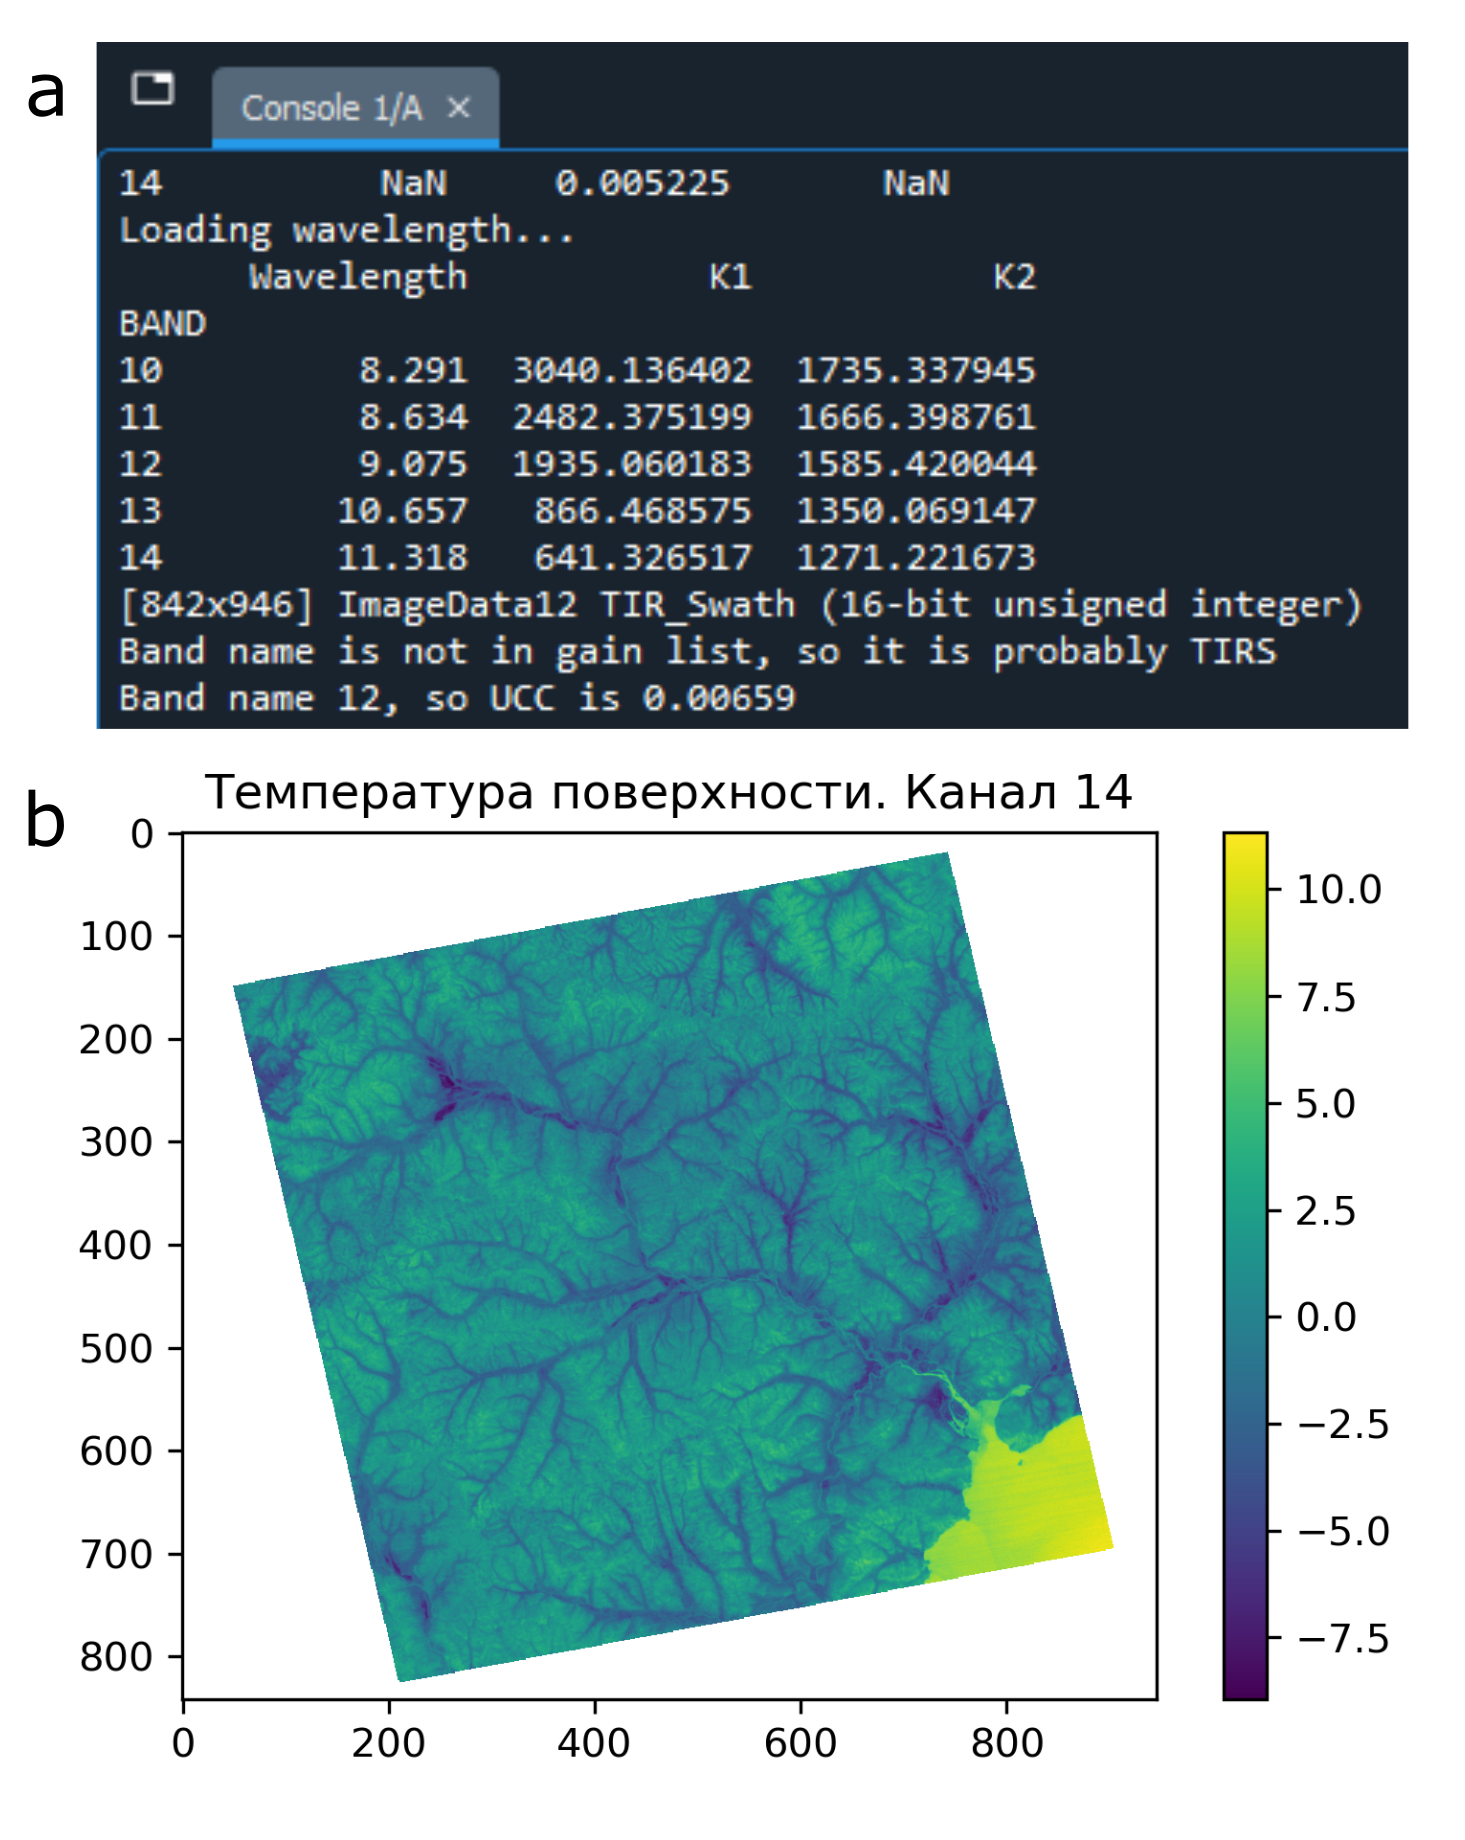

Рис. 2. Текстовый (a) и графический (b) выводы, сопровождающие работу программы распаковки HDF файлов ASTER L1T.

Создаваемые программой GeoTiff файлы имеют имя, задаваемое по шаблону: "ImageData_L1T.НОМЕР_КАНАЛА__ДИАПАЗОН_Swath_ДАТА_ВРЕМЯ_СУТОК_ПУТЬ_РЯД_ВИД_ИНФОРМАЦИИ.tiff". Здесь НОМЕР_КАНАЛА это число, обозачающее номер, ДИАПАЗОН подразумевает диапазон значений (VNIR, SWIR, TIRS), ДАТА — дата съемки, ВРЕМЯ_СУТОК — соответственно, дневное или ночное время, ПУТЬ и РЯД — указание расположения снимка, а ВИД_ИНФОРМАЦИИ - значение единиц измерения (для TIRS это градусы Цельсия).

### Результаты исследования и их обсуждение

Тестирование приложения для распаковки данных ASTER L1T было выполнено для космического изображения вулкана Тятя, расположенного на севере острова Кунашир Большой Курильской гряды. Вулкан Тятя  относится к числу активных вулканов острова и относится к типу Сомма-Везувий, на основание древнего его плейстоценового конуса была сформирована современная вулканическая постройка. К северо-западу от него находится вулкан Руруй. Тятя сложен базальтами, андезибазальтами и двупироксеновыми андезитами позднейших стадий извержений [Мартынов и др., 2005]. Геологическое строение территории и расположение участка исследований показано на схематической карте (рис. 3).

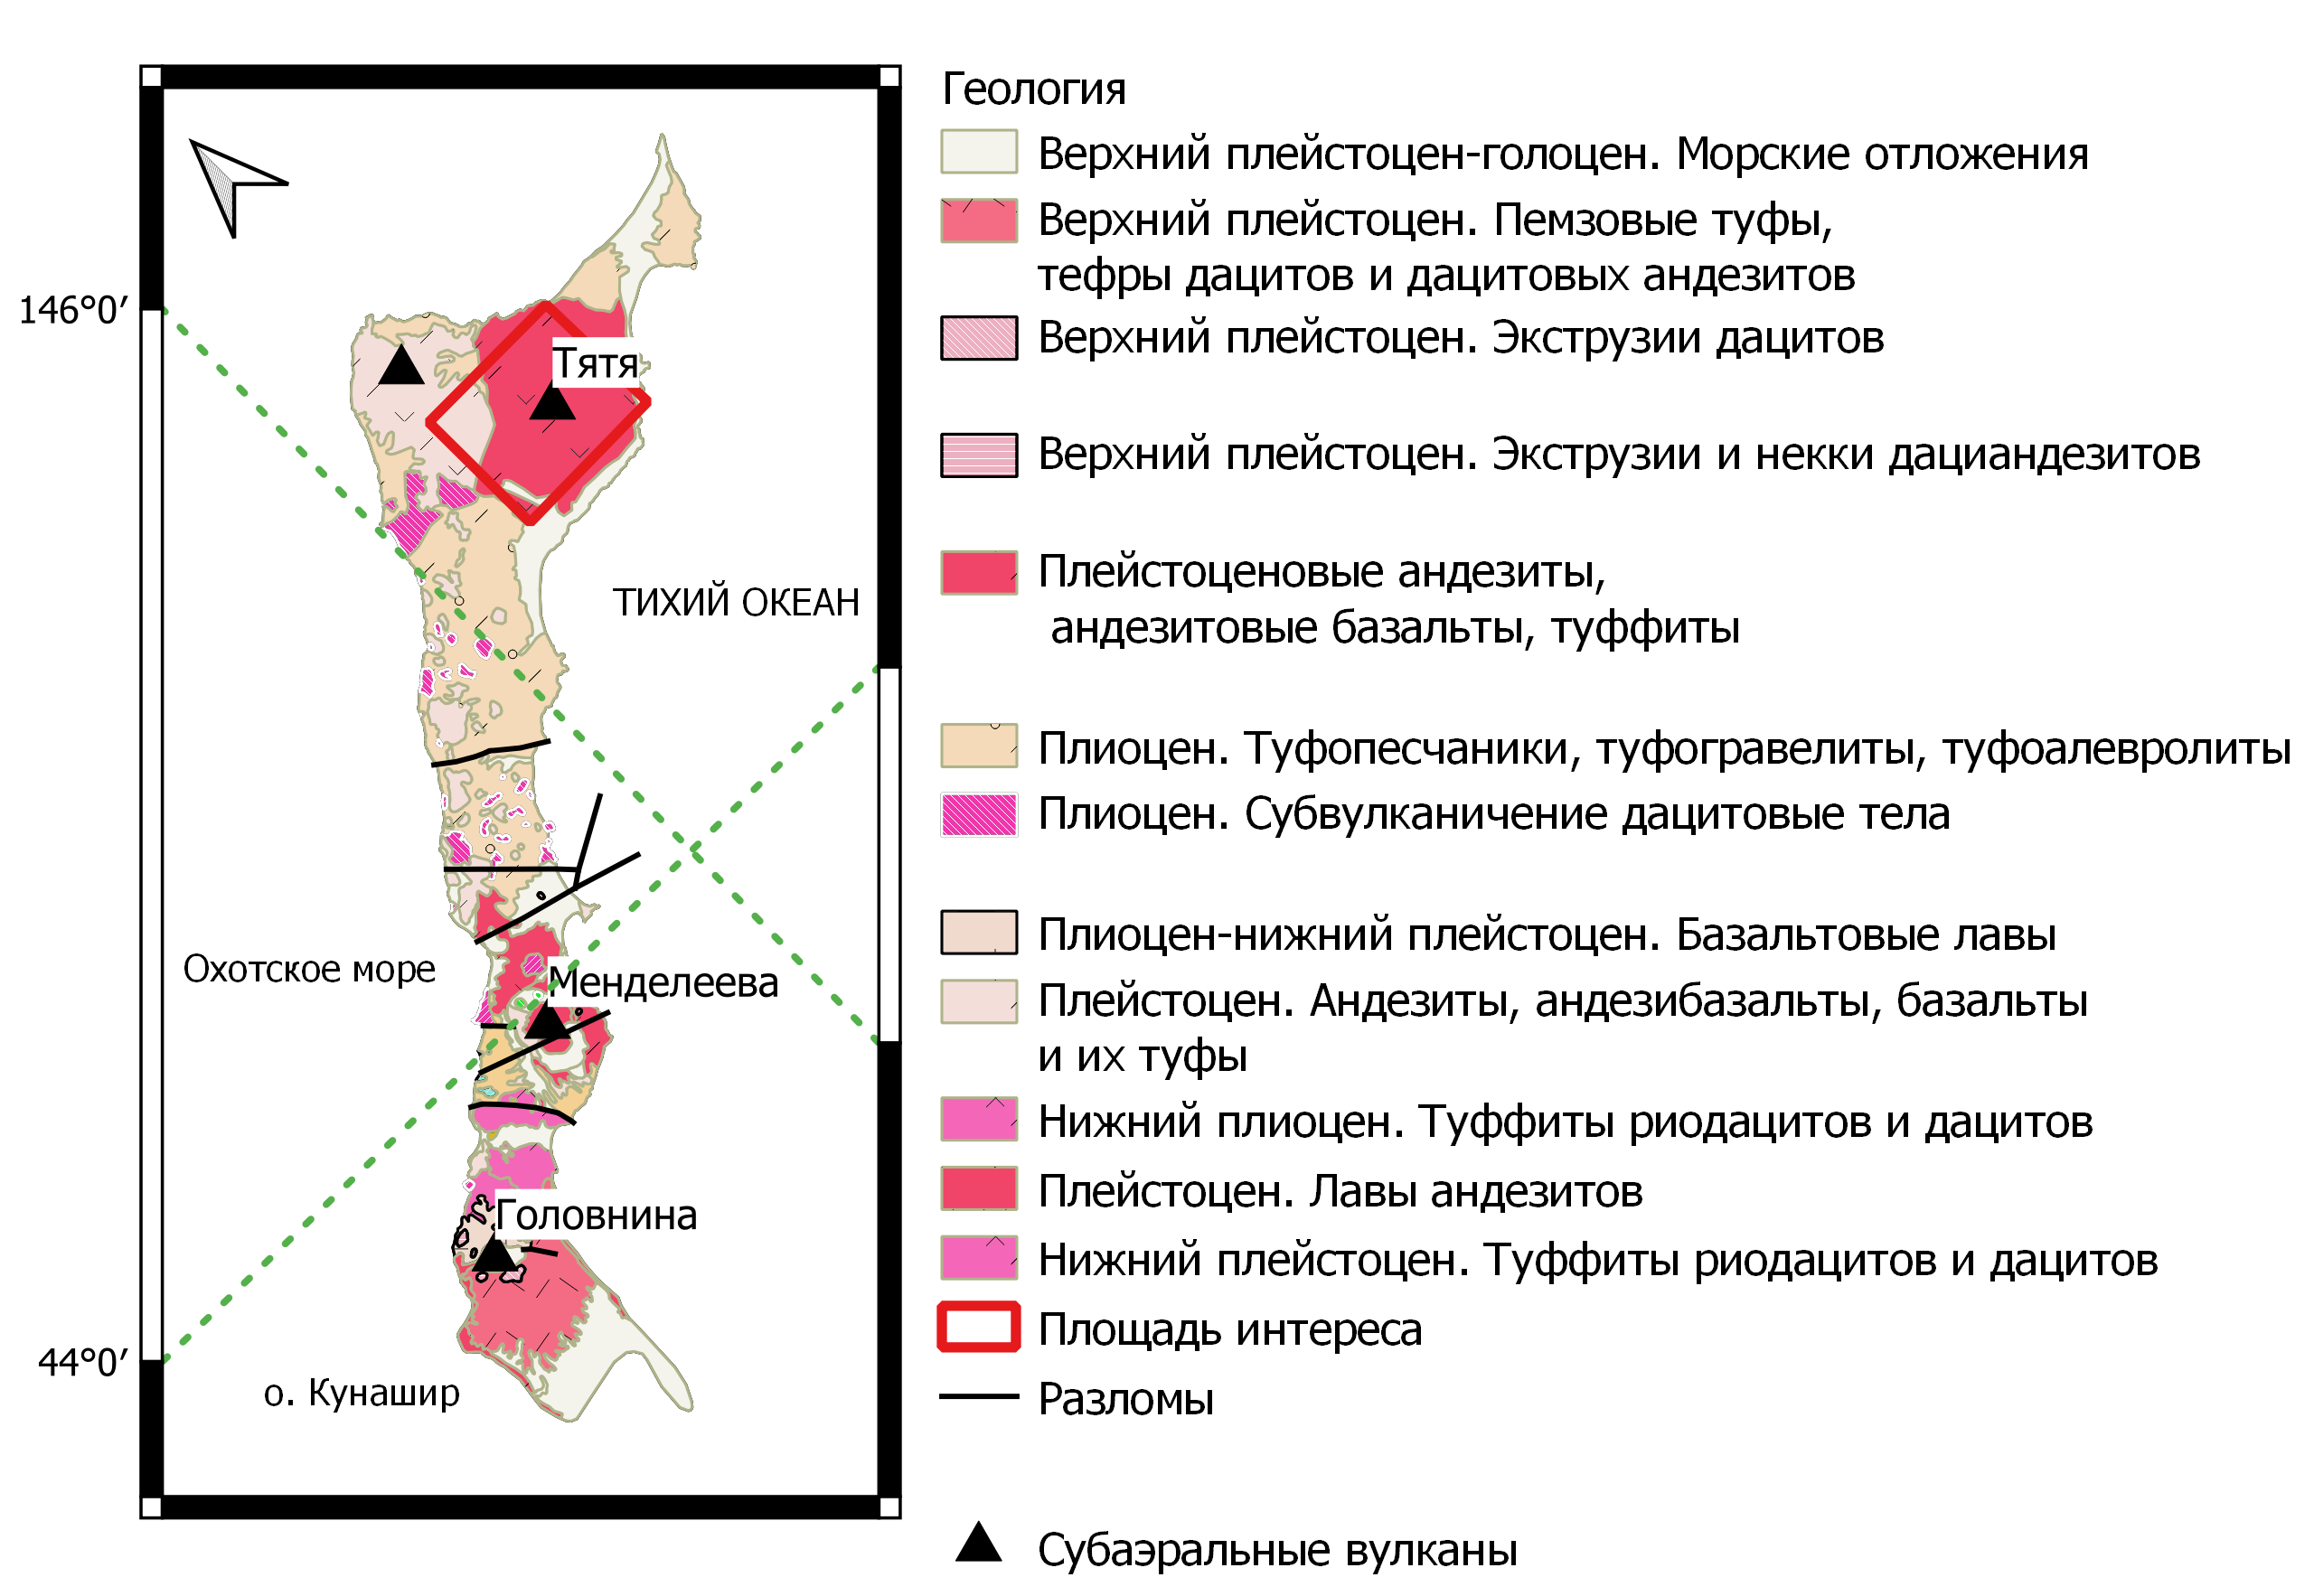

Рис. 3. Геологическая карта острова Кунашир с указанием положения участка детальных исследований (по [Shevyrev & Carranza, 2022]).


В подготовленной программе на языке Python нами была обработана сцена ASTER (p200r585), дата съемки 8 июля 2015 года (рис. 4). Выделенные локальные участки повышенных температур рассматривались как аномальные и заверялись с сопоставлением снимка Landsat 8 OLI в псевдоестественных цветах (4-3-2), отражающего состояние местности на 27 октября 2015 года с низким положением снеговой линии.

![fig4.png](attachment:fig4.png)

Рис. 4. Сопоставление фрагмента изображения температур поверхности (a), построенного на основе изображения ASTER L1T TIRS 14 (p200r585, дата съемки 8 июля 2015) и изображения Landsat 8 OLI в естественных цветах (RGB 4-3-2,  дата съемки 27 октября 2015 года). Цифры в кружках - локальные температурные аномалии.  


Визуальное сопоставление этих изображений позволило дать интерпретацию выделенным аномалиям. Объект, выделенный как участок таяния снега (рис. 4b),номер 1 в кружке, на температурном изображении не отмечается, тогда как объекты 2 и 3 выделяются на обоих изображениях. Объект 2, очевидно, соответствует жерлу кальдеры центрального конуса вулкана Тятя, его температура поверхности на снимке 10 и более градусов, тогда как он окружен областью отрицательных температур снеговой шапки. Объекту 3 соответствует температурная аномалия на склоне вулкана Руруй, возможно, сформированная одним из его паразитических конусов. 

### Выводы

Подготовленная программа распаковки HDF файлов дистанционных изображений ASTER L1T была апробирована на наборах данных, полученных из официального репозитория [EarthExplorer..., 2022]. В ходе тестирования программы на материалах съемок площади, включающей вулкан Тятя, проведены поиски и заверка локальных участков повышенных температур, которые затем сопоставлялись с участками таяния снежного покрова на осеннем снимке. 
Анализ получаемых с помощью программы температурных изображений ASTER может быть использован для выявления активных зон вулканических построек, а также для мониторинга динамики вулкана. 
Методические наработки и исполняемый код полученные при написании программы, являются практик-ориентированными и могут лечь в основу студенческих научных работ, а также использоваться при написании курсовых и дипломных исследований. 
Помимо поиска горячих полей и источников, программа может применяться для поиска коренных выходов горных пород, а также ретроспективной оценки площадей лесных пожаров.

Полный код программы показан ниже:

In [ ]:
import gdal,osr
from matplotlib import pyplot as plt
import numpy as np
import os
from skimage.transform import rescale, resize
import re
import pandas as pd
from datetime import datetime
import time

start_time=time.time();
print('Loading ucc coefficients...'); #from ASTER users handbook
ucc_df=pd.read_excel('ucc.xlsx',index_col='BAND');
print(ucc_df);
print('Loading wavelength...');
wl_df=pd.read_excel('wl1.xlsx',index_col='BAND');
print(wl_df);

#coefficient for the temperature computations
C1=1.19104356e-16;
C2=1.43876869e-2;


#set irradiance values band 1-9 (Thome, 2001)
irradiance=[1848,1549,1114,225.4,86.63,81.85,74.85,66.49,59.85]

#Solar irradiance TIR bands
#https://asterweb.jpl.nasa.gov/content/03_data/01_Data_Products/RN_surface_leaving_radiance-TIR.htm

irradiance.extend([0.006882,0.006780,0.006590,0.005693,0.005225]);

foldname='ASTER_L1T_Night_Cloudless';
foldname_full=foldname;
#foldname='ASTER_Day';
#foldname_full=foldname;

fcounter=0;

for fname in os.listdir(foldname_full):
    if fname.endswith('.hdf'):
        fname_full=os.path.join(foldname_full,fname);   
        fcounter+=1;
    else:
        continue;
    try:
        hdf_ds = gdal.Open(fname_full);
    except:
        print('can not open HDF file. Exiting...')
        continue;  
        
        
       
    # replace <subdataset> with the number of the subdataset you need, starting with 0
    #band_ds = gdal.Open(hdf_ds.GetSubDatasets()[<subdataset>][0], gdal.GA_ReadOnly)
    subdatasets_list=[band[1] for band in hdf_ds.GetSubDatasets()];
    
    
    #taking adjusctment resolution from 'ImageData1'
    
    for rec in subdatasets_list:
        if 'ImageData1' in rec:
            h=int(re.sub('[^0-9]','',rec.split(' ')[0].split('x')[0]));
            w=int(re.sub('[^0-9]','',rec.split(' ')[0].split('x')[1]));
            break;
    
       
    count=0;
    for subds in hdf_ds.GetSubDatasets():
            
        
        # open the subdataset
        band_ds = gdal.Open(subds[0])
        band_array = band_ds.ReadAsArray()
        
        if  band_array.shape[0]<500 or band_array.shape[1]<500 or\
            ('Longitude' in subdatasets_list[count]) or\
                ('Latitude' in subdatasets_list[count]):
            continue;
        else:
            print(subdatasets_list[count]);
        
        
        #read metadata
        meta=band_ds.GetMetadata();
        
        #determine path and row
        path_row_vp=[s.strip() for s in meta['ASTERSCENEID'].split(',')];
        path='_p'+path_row_vp[0];
        row='_r'+path_row_vp[1];
        
        #determine time of the day(day, night) and declare variable for filename
        daytime='';
        if 'OFF' in meta['ASTEROBSERVATIONMODE.1'] and 'OFF' in meta['ASTEROBSERVATIONMODE.2'] and\
            'OFF' in meta['ASTEROBSERVATIONMODE.3'] and 'ON' in meta['ASTEROBSERVATIONMODE.4']:
            daytime='Night';
        else:
            daytime='Day';
        calendardate=meta['CALENDARDATE'];
        
        
        #retrieving output directory name
        out_dir_name='AST_L1T_'+path+row+calendardate+'_'+daytime+'_Unpacked'
        #fcounter was added to overcome repeating dates out_dir_name
        #convert from DN to spectral radiance (Table 5, Aster handbook)
        band_name=subdatasets_list[count].split(' ')[1][9:]; #str type
        
        gain_list=[];
        for key in [*meta]:
            if 'GAIN' in key:
                gain_list.append(meta[key]);
                
        
        #searching for gain
        if band_name in str(gain_list): #if gain list has band gain
            for el in gain_list:
                if band_name in el:
                    try:
                        ind=int(band_name);
                    except:
                        ind=band_name;
                    
                    if 'LOW' in el:
                        ucc_val=ucc_df['Low_gain'][ind];
                    elif 'NOR' in el:
                        ucc_val=ucc_df['Normal_gain'][ind];
                    else:
                        ucc_val=ucc_df['High_gain'][ind];
                    break;
                
            
        else:
            print('Band name is not in gain list, so it is probably TIRS')
            ind=int(band_name);
            ucc_val=ucc_df['Normal_gain'][ind]
            print('Band name {}, so UCC is {}'.format(ind,ucc_val))
                
                
        if np.isnan(ucc_val)==True:
            print('Can not get gain value for band {}, band was skipped'.format(band_name));    
            continue;
            
        #computing radiance
        band_radiance=(np.float64(band_array)-1)*ucc_val;
        
        #converting radiance to surface temperature http://www.pancroma.com/downloads/ASTER%20Temperature%20and%20Reflectance.pdf
        try:
            ind=int(band_name);
        except:
            ind=band_name;
        if ind in [10,11,12,13,14]:
            #if we deal with TIRS bands
            print('Converting TIRS band radiance to surface temperature...')
            _lambda=(wl_df['Wavelength'][ind]*1e-6);
            K1=(C1/(_lambda)**5)/1e6
            K2=C2/(_lambda)
            Brightness_Temperature=K2/(np.log((K1/band_radiance)+1))-273; #K->C
            #Surface_Temperature=Brightness_Temperature/(1+(_lambda*Brightness_Temperature/C2))
            Surface_Temperature=Brightness_Temperature;
        
        
        """
        compare coefficients
        https://semiautomaticclassificationmanual-v5.readthedocs.io/id/latest/thematic_tutorial_temperature.html#reclassification-of-land-cover-classification-to-emissivity-values
        
        http://www.pancroma.com/downloads/ASTER%20Temperature%20and%20Reflectance.pdf
        """
        
        
        #solar zenith angle
        sza=float(meta['SOLARDIRECTION'].split()[1]);
        
        #compute earth-sun distance
        date=fname[15:19]+'/'+fname[11:13]+'/'+fname[13:15];
        doy= int(datetime.strptime(date, '%Y/%m/%d').strftime('%j'));
        earth_sun_dist = (1 - 0.01672 * np.cos(np.deg2rad(0.9856 * (doy - 4))));
        
        #get irradiance for band
        band_irradiance=irradiance[int(band_name[0])-1];
        
        band_reflectance=(np.pi*band_radiance*(earth_sun_dist**2))/(band_irradiance*np.cos(np.deg2rad(sza)))
        
        del band_radiance,band_array; #remove unnecessary variables
        
    
        #check radiometric range in band array, normalize to uint16 if uint8
        """
        if 'uint8' in str(type(band_array[0,0])):
            b_a16=np.uint16((np.float64(band_array)/255)*(2**16));
            band_array=b_a16.copy(); del b_a16;
        """
        
        # get the projection
        geoTrans = band_ds.GetGeoTransform()
        proj = band_ds.GetProjection() # Well-Known Text.
        
        #srs = osr.SpatialReference()
        #srs.ImportFromEPSG(27700)
        #ds.SetProjection(srs.ExportToWkt())
        
        
        # Set file vars
        output_file = subdatasets_list[count].split(' ')[1]+\
                            '_'+subdatasets_list[count].split(' ')[2]+'_b'+\
                                subdatasets_list[count].split(' ')[1][9:]+\
                                calendardate+daytime+path+row+'.tif'
        
        out_file_name=os.path.join('..',out_dir_name,output_file);                        
        
        if ind in [10,11,12,13,14]:
            output_file_temperature = subdatasets_list[count].split(' ')[1]+\
                                '_'+subdatasets_list[count].split(' ')[2]+'_b'+\
                                    subdatasets_list[count].split(' ')[1][9:]+\
                                    calendardate+daytime+path+row+'degC.tif';
            out_file_temperature_name=os.path.join('..',out_dir_name,output_file_temperature);
        
           
        
        WIDTH=band_reflectance.shape[1];
        HEIGHT=band_reflectance.shape[0];
        
        ULX=float(meta['UPPERLEFTM'].split(',')[1])
        URX=float(meta['UPPERRIGHTM'].split(',')[1])
        LLX=float(meta['LOWERLEFTM'].split(',')[1])
        LRX=float(meta['LOWERRIGHTM'].split(',')[1])
        
        ULY=float(meta['UPPERLEFTM'].split(',')[0])
        URY=float(meta['UPPERRIGHTM'].split(',')[0])
        LLY=float(meta['LOWERLEFTM'].split(',')[0])
        LRY=float(meta['LOWERRIGHTM'].split(',')[0])
        
        resx=-(ULX-URX)/WIDTH;
        resy=-(ULY-LLY)/HEIGHT;
        
        if w!=band_reflectance.shape[1] or h!=band_reflectance.shape[0]:
            band_reflectance = resize(band_reflectance, (h, w), anti_aliasing=True,preserve_range=True)       
            WIDTH=w;
            HEIGHT=h;
            resx=-(ULX-URX)/WIDTH;
            resy=-(ULY-LLY)/HEIGHT;
        
        
        #show image
        plt.imshow(band_reflectance)
        plt.colorbar()
        plt.show()
        
        if ind in [10,11,12,13,14]:
            plt.imshow(Surface_Temperature)
            plt.title('Surface Temperature '+band_name)
            plt.colorbar()
            plt.show()
        
        # Create gtif
        driver = gdal.GetDriverByName("GTiff")
        
        
        if os.path.isdir(os.path.join('..',out_dir_name))==False:
            os.mkdir(os.path.join('..',out_dir_name));    
        """
        if ('8-bit' in subdatasets_list[count]) or ('16-bit' in subdatasets_list[count]):
            dt=gdal.GDT_UInt16;
        else:
            dt=gdal.GDT_Float64;
        """
        dt=gdal.GDT_Float64;
        
        dst_ds = driver.Create(out_file_name, WIDTH, HEIGHT, 1, dt,options=['COMPRESS=LZW'])
        
        if ind in [10,11,12,13,14]:
           dst_ds_t = driver.Create(out_file_temperature_name, WIDTH, HEIGHT, 1, dt,options=['COMPRESS=LZW'])
        
        #set the reference info 
        srs = osr.SpatialReference()
        srs.ImportFromEPSG(32600+int(meta['UTMZONENUMBER'])) #update EPSG according to zone number
        
        dst_ds.SetProjection(srs.ExportToWkt())
        
        # top left x, w-e pixel resolution, rotation, top left y, rotation, n-s pixel resolution
        dst_ds.SetGeoTransform([ULX, resx, 0, ULY, 0, resy]);
        if ind in [10,11,12,13,14]:
            dst_ds_t.SetProjection(srs.ExportToWkt())
            dst_ds_t.SetGeoTransform([ULX, resx, 0, ULY, 0, resy]);
            dst_ds_t.GetRasterBand(1).WriteArray(Surface_Temperature)
            dst_ds_t.FlushCache() ##saves 
            dst_ds_t=None
        
        #srs = osr.SpatialReference()
        #srs.SetWellKnownGeogCS("WGS84")
        #dst_ds.SetProjection( srs.ExportToWkt() )
        
        # write the band
        #I set my nodata values in array to be 255
        
        dst_ds.GetRasterBand(1).WriteArray(band_reflectance) 
        #dst_ds.GetRasterBand(1).SetNoDataValue(-65536)
        dst_ds.FlushCache() ##saves 
        dst_ds=None #without this thing is not working
        
        count+=1;
    sec=time.time()-start_time;
    print('Directory processing is over. {} files were processed. It took {} s'.format(fcounter,sec))

### Список литературы 

<ol>
<li>Изображения Terra ASTER 1 уровня обработки. [Электронный ресурс]. URL: https://lpdaac.usgs.gov/products/ast_l1tv003/ (дата обращения: 29.08.2022)</li>

<li>EarthExplorer, USGS. [Электронный ресурс]. URL: https://earthexplorer.usgs.gov (дата обращения:  29.08.2022)</li>

<li>Working with ASTER L1T Visible and Near Infrared (VNIR) Data. [Электронный ресурс]. URL: https://lpdaac.usgs.gov/resources/e-learning/working-aster-l1t-visible-and-near-infrared-vnir-data-r/ (дата обращения: 29.08.2022).</li>

<li>Hierarchical data format (HDF). [Электронный ресурс]. URL: 
https://asdc.larc.nasa.gov/documents/tools/hdf.pdf (дата обращения: 29.08.2022). </li>

<li>GDAL  Documentation. [Электронный ресурс]. URL: https://gdal.org/ (дата обращения: 29.08.2022). </li>

<li>GDAL  lisense. [Электронный ресурс]. URL: https://gdal.org/license.html (дата обращения: 29.08.2022). </li>
    
<li>GDAL  application programming interface (API). [Электронный ресурс]. URL: https://gdal.org/api/index.html (дата обращения: 29.08.2022)</li>
<li>Abrams M., Hook S., Ramachandram B. Aster user handbook, Version 2. NASA/Jet Propulsion Laboratory, Pasadena, CA. 1999. [Электронный ресурс]. URL: https://asterweb.jpl.nasa.gov/content/03_data/04_Documents/aster_user_guide_v2.pdf. (дата обращения: 29.08.2022).</li>
<li>Shevyrev S.L. ASTER L1T HDF unpacker. [Electronic resource]. URL: https://github.com/SergeiShevyrev/py_h2t (date of access: 22.09.2022).</li>
<li>Landsat 7 Science Data Users Handbook. [Electronic resource]. URL: https://landsat.gsfc.nasa.gov/wp-content/uploads/2016/08/Landsat7_Handbook.pdf (date of access: 22.09.2022).</li>
<li>Thome K.J., Biggar S.F., SLATER P.N. Effects of assumed solar spectral irradiance on intercomparisons of earth-observing sensors. In International Symposium on Remote Sensing, International Society for Optics and Photonics. 2001. Pp. 260-269. http://dx.doi.org/10.1117/12.450668.</li> 
<li>Ghulam A. How to calculate reflectance and temperature using ASTER data.  [Electronic resource]. URL: http://www.pancroma.com/downloads/ASTER%20Temperature%20and%20Reflectance.pdf (date of access: 22.09.2022).</li>
<li>Shevyrev S., Carranza E.J.M. Application of maximum entropy for mineral prospectivity mapping in heavily vegetated areas of Greater Kurile Chain with Landsat 8 data // Ore Geology Reviews, Vol.142, 2022,104758. https://doi.org/10.1016/j.oregeorev.2022.104758.</li>    
<li>Мартынов Ю.А.,Мартынов А.Ю., Чащин А.А., Рыбин А.В. Базальты вулкана Тятя: петрология и генезис (остров Кунашир, Курильская островная дуга) // Тихоокеанская геология, 2005, т. 24. №3, с. 22-31</li>

</ol>
